In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
fed_6_m = pd.read_csv('Economic Data/6m_t_bills_min_fed_funds_rate.csv')
fed_6_m

,DATE,TB6SMFFM
0,1958-12-01,0.59
1,1959-01-01,0.61
2,1959-02-01,0.70
3,1959-03-01,0.33
4,1959-04-01,0.31
...,...,...
785,2024-05-01,-0.16
786,2024-06-01,-0.18
787,2024-07-01,-0.32
788,2024-08-01,-0.59


In [3]:
fed_6_m["DATE"] = pd.to_datetime(fed_6_m["DATE"], format='%Y-%m-%d')
#fed_6_m["DATE"] = fed_6_m["DATE"].dt.strftime('%d/%m/%Y')
fed_6_m

,DATE,TB6SMFFM
0,1958-12-01,0.59
1,1959-01-01,0.61
2,1959-02-01,0.70
3,1959-03-01,0.33
4,1959-04-01,0.31
...,...,...
785,2024-05-01,-0.16
786,2024-06-01,-0.18
787,2024-07-01,-0.32
788,2024-08-01,-0.59


In [4]:
# Create a quarter column
fed_6_m["Quarter"] = fed_6_m["DATE"].dt.to_period('Q')
fed_6_m

,DATE,TB6SMFFM,Quarter
0,1958-12-01,0.59,1958Q4
1,1959-01-01,0.61,1959Q1
2,1959-02-01,0.70,1959Q1
3,1959-03-01,0.33,1959Q1
4,1959-04-01,0.31,1959Q2
...,...,...,...
785,2024-05-01,-0.16,2024Q2
786,2024-06-01,-0.18,2024Q2
787,2024-07-01,-0.32,2024Q3
788,2024-08-01,-0.59,2024Q3


In [5]:
fed_6_m = fed_6_m.groupby(["Quarter"], as_index=False)["TB6SMFFM"].mean().rename(columns = {"TB6SMFFM":"fed_6_m_quarterly"})
fed_6_m

,Quarter,fed_6_m_quarterly
0,1958Q4,0.590000
1,1959Q1,0.546667
2,1959Q2,0.290000
3,1959Q3,0.553333
4,1959Q4,0.650000
...,...,...
259,2023Q3,0.026667
260,2023Q4,-0.100000
261,2024Q1,-0.256667
262,2024Q2,-0.173333


In [6]:
fed_6_m.to_csv("fed_6_m_treasury_minus_fed_quarterly.csv", index=False)

In [18]:
fed_6_m = pd.read_csv("Economic Data/fed_6_m_treasury_minus_fed_quarterly.csv")
fed_6_m["Quarter"] = pd.to_datetime(fed_6_m["Quarter"]).dt.to_period('Q')
fed_6_m.dtypes

/var/folders/4s/q4zndhns13bdmf7q1_8p3crc0000gn/T/ipykernel_66344/3210677802.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fed_6_m["Quarter"] = pd.to_datetime(fed_6_m["Quarter"]).dt.to_period('Q')


Quarter              period[Q-DEC]
fed_6_m_quarterly          float64
dtype: object

In [19]:
fed_6_m

,Quarter,fed_6_m_quarterly
0,1958Q4,0.590000
1,1959Q1,0.546667
2,1959Q2,0.290000
3,1959Q3,0.553333
4,1959Q4,0.650000
...,...,...
259,2023Q3,0.026667
260,2023Q4,-0.100000
261,2024Q1,-0.256667
262,2024Q2,-0.173333


In [3]:
# Doing the same for the other data sources
treasury_5_year =  pd.read_csv("Economic Data/treasury_five_min_fed_rate.csv")
treasury_5_year

,DATE,T5YFF
0,1962-01-01,1.4117741935483871
1,1962-04-01,0.99253968253968253968
2,1962-07-01,0.89412698412698412698
3,1962-10-01,0.67816666666666666667
4,1963-01-01,0.68557377049180327869
...,...,...
247,2023-10-01,-0.90225806451612903226
248,2024-01-01,-1.2080327868852459
249,2024-04-01,-0.86571428571428571429
250,2024-07-01,-1.4679687500000000


In [4]:
treasury_5_year["DATE"] = pd.to_datetime(treasury_5_year["DATE"], format='%Y-%m-%d')
treasury_5_year

,DATE,T5YFF
0,1962-01-01,1.4117741935483871
1,1962-04-01,0.99253968253968253968
2,1962-07-01,0.89412698412698412698
3,1962-10-01,0.67816666666666666667
4,1963-01-01,0.68557377049180327869
...,...,...
247,2023-10-01,-0.90225806451612903226
248,2024-01-01,-1.2080327868852459
249,2024-04-01,-0.86571428571428571429
250,2024-07-01,-1.4679687500000000


In [15]:
# Data is already quarterly, need to create the quartlery column
treasury_5_year["Quarter"] = treasury_5_year["DATE"].dt.to_period('Q')
treasury_5_year.dtypes

DATE       datetime64[ns]
T5YFF              object
Quarter     period[Q-DEC]
dtype: object

In [21]:
# Let us merge the first two dfs to start buildng the main df

df = pd.merge(fed_6_m, treasury_5_year, how='left', on='Quarter')
df

,Quarter,fed_6_m_quarterly,DATE,T5YFF
0,1958Q4,0.590000,NaT,NaN
1,1959Q1,0.546667,NaT,NaN
2,1959Q2,0.290000,NaT,NaN
3,1959Q3,0.553333,NaT,NaN
4,1959Q4,0.650000,NaT,NaN
...,...,...,...,...
259,2023Q3,0.026667,2023-07-01,-0.95095238095238095238
260,2023Q4,-0.100000,2023-10-01,-0.90225806451612903226
261,2024Q1,-0.256667,2024-01-01,-1.2080327868852459
262,2024Q2,-0.173333,2024-04-01,-0.86571428571428571429


In [27]:
#df = df.drop(columns=["DATE"])
df.rename(columns={"T5YFF":"fed_5_y_quarterly"}, inplace=True)
df

,Quarter,fed_6_m_quarterly,fed_5_y_quarterly
0,1958Q4,0.590000,NaN
1,1959Q1,0.546667,NaN
2,1959Q2,0.290000,NaN
3,1959Q3,0.553333,NaN
4,1959Q4,0.650000,NaN
...,...,...,...
259,2023Q3,0.026667,-0.95095238095238095238
260,2023Q4,-0.100000,-0.90225806451612903226
261,2024Q1,-0.256667,-1.2080327868852459
262,2024Q2,-0.173333,-0.86571428571428571429


In [29]:
# Working on CPI 
# Same as previous file, it's already quarterly data, we just need to change it to a quarters based format

cpi_monthly = pd.read_csv("Economic Data/CPI_average_quarterly.csv")
cpi_monthly

,DATE,CPIAUCSL
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
927,2024-04-01,313.207
928,2024-05-01,313.225
929,2024-06-01,313.049
930,2024-07-01,313.534


In [30]:
cpi_monthly["Quarter"] = pd.to_datetime(cpi_monthly["DATE"]).dt.to_period('Q')
cpi_monthly

,DATE,CPIAUCSL,Quarter
0,1947-01-01,21.480,1947Q1
1,1947-02-01,21.620,1947Q1
2,1947-03-01,22.000,1947Q1
3,1947-04-01,22.000,1947Q2
4,1947-05-01,21.950,1947Q2
...,...,...,...
927,2024-04-01,313.207,2024Q2
928,2024-05-01,313.225,2024Q2
929,2024-06-01,313.049,2024Q2
930,2024-07-01,313.534,2024Q3


In [31]:
cpi_monthly = cpi_monthly.groupby(["Quarter"], as_index=False)["CPIAUCSL"].mean().rename(columns = {"CPIAUCSL":"CPI"})
cpi_monthly

,Quarter,CPI
0,1947Q1,21.700000
1,1947Q2,22.010000
2,1947Q3,22.490000
3,1947Q4,23.126667
4,1948Q1,23.616667
...,...,...
306,2023Q3,306.034333
307,2023Q4,308.099000
308,2024Q1,310.989667
309,2024Q2,313.160333


In [32]:
df = pd.merge(cpi_monthly, df , how='left', on='Quarter')
df

,Quarter,CPI,fed_6_m_quarterly,fed_5_y_quarterly
0,1947Q1,21.700000,NaN,NaN
1,1947Q2,22.010000,NaN,NaN
2,1947Q3,22.490000,NaN,NaN
3,1947Q4,23.126667,NaN,NaN
4,1948Q1,23.616667,NaN,NaN
...,...,...,...,...
306,2023Q3,306.034333,0.026667,-0.95095238095238095238
307,2023Q4,308.099000,-0.100000,-0.90225806451612903226
308,2024Q1,310.989667,-0.256667,-1.2080327868852459
309,2024Q2,313.160333,-0.173333,-0.86571428571428571429


In [33]:
fed_funds = pd.read_csv("Economic Data/federal_funds_rate_not_seasonally_adjusted.csv")
fed_funds

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
837,2024-04-01,5.33
838,2024-05-01,5.33
839,2024-06-01,5.33
840,2024-07-01,5.33


In [35]:
fed_funds["Quarterly"] = pd.to_datetime(fed_funds["DATE"]).dt.to_period('Q')
fed_funds

,DATE,FEDFUNDS,Quarterly
0,1954-07-01,0.80,1954Q3
1,1954-08-01,1.22,1954Q3
2,1954-09-01,1.07,1954Q3
3,1954-10-01,0.85,1954Q4
4,1954-11-01,0.83,1954Q4
...,...,...,...
837,2024-04-01,5.33,2024Q2
838,2024-05-01,5.33,2024Q2
839,2024-06-01,5.33,2024Q2
840,2024-07-01,5.33,2024Q3


In [36]:
fed_funds = fed_funds.groupby(["Quarterly"], as_index=False)["FEDFUNDS"].mean().rename(columns = {"FEDFUNDS":"Interest Rate"})
fed_funds

,Quarterly,Interest Rate
0,1954Q3,1.030000
1,1954Q4,0.986667
2,1955Q1,1.343333
3,1955Q2,1.500000
4,1955Q3,1.940000
...,...,...
276,2023Q3,5.260000
277,2023Q4,5.330000
278,2024Q1,5.330000
279,2024Q2,5.330000


In [38]:
fed_funds.rename(columns={"Quarterly":"Quarter"}, inplace=True)

In [40]:
df = pd.merge(df, fed_funds, how='left', on="Quarter")
df

,Quarter,CPI,fed_6_m_quarterly,fed_5_y_quarterly,Interest Rate
0,1947Q1,21.700000,NaN,NaN,NaN
1,1947Q2,22.010000,NaN,NaN,NaN
2,1947Q3,22.490000,NaN,NaN,NaN
3,1947Q4,23.126667,NaN,NaN,NaN
4,1948Q1,23.616667,NaN,NaN,NaN
...,...,...,...,...,...
306,2023Q3,306.034333,0.026667,-0.95095238095238095238,5.26
307,2023Q4,308.099000,-0.100000,-0.90225806451612903226,5.33
308,2024Q1,310.989667,-0.256667,-1.2080327868852459,5.33
309,2024Q2,313.160333,-0.173333,-0.86571428571428571429,5.33


In [43]:
gdp = pd.read_csv("Economic Data/GDP_quarterly.csv")
gdp

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
305,2023-04-01,27063.012
306,2023-07-01,27610.128
307,2023-10-01,27956.998
308,2024-01-01,28269.174


In [44]:
gdp["Quarter"] = pd.to_datetime(gdp["DATE"]).dt.to_period('Q')
gdp

,DATE,GDP,Quarter
0,1947-01-01,243.164,1947Q1
1,1947-04-01,245.968,1947Q2
2,1947-07-01,249.585,1947Q3
3,1947-10-01,259.745,1947Q4
4,1948-01-01,265.742,1948Q1
...,...,...,...
305,2023-04-01,27063.012,2023Q2
306,2023-07-01,27610.128,2023Q3
307,2023-10-01,27956.998,2023Q4
308,2024-01-01,28269.174,2024Q1


In [45]:
gdp = gdp.groupby(["Quarter"], as_index=False)["GDP"].mean()
gdp

,Quarter,GDP
0,1947Q1,243.164
1,1947Q2,245.968
2,1947Q3,249.585
3,1947Q4,259.745
4,1948Q1,265.742
...,...,...
305,2023Q2,27063.012
306,2023Q3,27610.128
307,2023Q4,27956.998
308,2024Q1,28269.174


In [46]:
df = pd.merge(df, gdp, how='left', on="Quarter")
df


,Quarter,CPI,fed_6_m_quarterly,fed_5_y_quarterly,Interest Rate,GDP
0,1947Q1,21.700000,NaN,NaN,NaN,243.164
1,1947Q2,22.010000,NaN,NaN,NaN,245.968
2,1947Q3,22.490000,NaN,NaN,NaN,249.585
3,1947Q4,23.126667,NaN,NaN,NaN,259.745
4,1948Q1,23.616667,NaN,NaN,NaN,265.742
...,...,...,...,...,...,...
306,2023Q3,306.034333,0.026667,-0.95095238095238095238,5.26,27610.128
307,2023Q4,308.099000,-0.100000,-0.90225806451612903226,5.33,27956.998
308,2024Q1,310.989667,-0.256667,-1.2080327868852459,5.33,28269.174
309,2024Q2,313.160333,-0.173333,-0.86571428571428571429,5.33,28652.337


In [47]:
#####################
# Housing Index
#####################

housing = pd.read_csv("Economic Data/house_price_index_us_quartelry_not_seasonal.csv")
housing

,DATE,USSTHPI
0,1975-01-01,60.03
1,1975-04-01,60.96
2,1975-07-01,61.19
3,1975-10-01,62.24
4,1976-01-01,62.78
...,...,...
193,2023-04-01,644.13
194,2023-07-01,656.36
195,2023-10-01,657.83
196,2024-01-01,664.85


In [48]:
housing["Quarter"] = pd.to_datetime(housing["DATE"]).dt.to_period('Q')
housing

,DATE,USSTHPI,Quarter
0,1975-01-01,60.03,1975Q1
1,1975-04-01,60.96,1975Q2
2,1975-07-01,61.19,1975Q3
3,1975-10-01,62.24,1975Q4
4,1976-01-01,62.78,1976Q1
...,...,...,...
193,2023-04-01,644.13,2023Q2
194,2023-07-01,656.36,2023Q3
195,2023-10-01,657.83,2023Q4
196,2024-01-01,664.85,2024Q1


In [49]:
df = pd.merge(df, housing, how='left', on="Quarter")
df

,Quarter,CPI,fed_6_m_quarterly,fed_5_y_quarterly,Interest Rate,GDP,DATE,USSTHPI
0,1947Q1,21.700000,NaN,NaN,NaN,243.164,NaN,NaN
1,1947Q2,22.010000,NaN,NaN,NaN,245.968,NaN,NaN
2,1947Q3,22.490000,NaN,NaN,NaN,249.585,NaN,NaN
3,1947Q4,23.126667,NaN,NaN,NaN,259.745,NaN,NaN
4,1948Q1,23.616667,NaN,NaN,NaN,265.742,NaN,NaN
...,...,...,...,...,...,...,...,...
306,2023Q3,306.034333,0.026667,-0.95095238095238095238,5.26,27610.128,2023-07-01,656.36
307,2023Q4,308.099000,-0.100000,-0.90225806451612903226,5.33,27956.998,2023-10-01,657.83
308,2024Q1,310.989667,-0.256667,-1.2080327868852459,5.33,28269.174,2024-01-01,664.85
309,2024Q2,313.160333,-0.173333,-0.86571428571428571429,5.33,28652.337,2024-04-01,682.18


In [50]:
df.rename(columns={"USSTHPI":"Housing_Index"}, inplace=True)

In [52]:
c_bond_yield = pd.read_csv("Economic Data/moody_aaa_corporate_bond_yield_monthly_not_seasonal.csv")
c_bond_yield

,DATE,AAA
0,1919-01-01,5.35
1,1919-02-01,5.35
2,1919-03-01,5.39
3,1919-04-01,5.44
4,1919-05-01,5.39
...,...,...
1263,2024-04-01,5.28
1264,2024-05-01,5.25
1265,2024-06-01,5.13
1266,2024-07-01,5.12


In [53]:
c_bond_yield["Quarter"] = pd.to_datetime(c_bond_yield["DATE"]).dt.to_period('Q')
c_bond_yield = c_bond_yield.groupby(["Quarter"], as_index=False)["AAA"].mean().rename(columns = {"AAA":"corporate_yield"})
c_bond_yield

,Quarter,corporate_yield
0,1919Q1,5.363333
1,1919Q2,5.410000
2,1919Q3,5.533333
3,1919Q4,5.643333
4,1920Q1,5.843333
...,...,...
418,2023Q3,4.913333
419,2023Q4,5.210000
420,2024Q1,4.970000
421,2024Q2,5.220000


In [54]:
df = pd.merge(df, c_bond_yield, how='left', on="Quarter")
df

,Quarter,CPI,fed_6_m_quarterly,fed_5_y_quarterly,Interest Rate,GDP,DATE,Housing_Index,corporate_yield
0,1947Q1,21.700000,NaN,NaN,NaN,243.164,NaN,NaN,2.556667
1,1947Q2,22.010000,NaN,NaN,NaN,245.968,NaN,NaN,2.536667
2,1947Q3,22.490000,NaN,NaN,NaN,249.585,NaN,NaN,2.573333
3,1947Q4,23.126667,NaN,NaN,NaN,259.745,NaN,NaN,2.776667
4,1948Q1,23.616667,NaN,NaN,NaN,265.742,NaN,NaN,2.846667
...,...,...,...,...,...,...,...,...,...
306,2023Q3,306.034333,0.026667,-0.95095238095238095238,5.26,27610.128,2023-07-01,656.36,4.913333
307,2023Q4,308.099000,-0.100000,-0.90225806451612903226,5.33,27956.998,2023-10-01,657.83,5.210000
308,2024Q1,310.989667,-0.256667,-1.2080327868852459,5.33,28269.174,2024-01-01,664.85,4.970000
309,2024Q2,313.160333,-0.173333,-0.86571428571428571429,5.33,28652.337,2024-04-01,682.18,5.220000


In [55]:
unemp = pd.read_csv("Economic Data/unemployment_rate.csv")
unemp

,DATE,UNRATE
0,1948-01-01,3.733333
1,1948-04-01,3.666667
2,1948-07-01,3.766667
3,1948-10-01,3.833333
4,1949-01-01,4.666667
...,...,...
302,2023-07-01,3.700000
303,2023-10-01,3.733333
304,2024-01-01,3.800000
305,2024-04-01,4.000000


In [56]:
unemp["Quarter"] = pd.to_datetime(unemp["DATE"]).dt.to_period('Q')
unemp

,DATE,UNRATE,Quarter
0,1948-01-01,3.733333,1948Q1
1,1948-04-01,3.666667,1948Q2
2,1948-07-01,3.766667,1948Q3
3,1948-10-01,3.833333,1948Q4
4,1949-01-01,4.666667,1949Q1
...,...,...,...
302,2023-07-01,3.700000,2023Q3
303,2023-10-01,3.733333,2023Q4
304,2024-01-01,3.800000,2024Q1
305,2024-04-01,4.000000,2024Q2


In [57]:
df = pd.merge(df, unemp, how='left', on="Quarter")
df

,Quarter,CPI,fed_6_m_quarterly,fed_5_y_quarterly,Interest Rate,GDP,DATE_x,Housing_Index,corporate_yield,DATE_y,UNRATE
0,1947Q1,21.700000,NaN,NaN,NaN,243.164,NaN,NaN,2.556667,NaN,NaN
1,1947Q2,22.010000,NaN,NaN,NaN,245.968,NaN,NaN,2.536667,NaN,NaN
2,1947Q3,22.490000,NaN,NaN,NaN,249.585,NaN,NaN,2.573333,NaN,NaN
3,1947Q4,23.126667,NaN,NaN,NaN,259.745,NaN,NaN,2.776667,NaN,NaN
4,1948Q1,23.616667,NaN,NaN,NaN,265.742,NaN,NaN,2.846667,1948-01-01,3.733333
...,...,...,...,...,...,...,...,...,...,...,...
306,2023Q3,306.034333,0.026667,-0.95095238095238095238,5.26,27610.128,2023-07-01,656.36,4.913333,2023-07-01,3.700000
307,2023Q4,308.099000,-0.100000,-0.90225806451612903226,5.33,27956.998,2023-10-01,657.83,5.210000,2023-10-01,3.733333
308,2024Q1,310.989667,-0.256667,-1.2080327868852459,5.33,28269.174,2024-01-01,664.85,4.970000,2024-01-01,3.800000
309,2024Q2,313.160333,-0.173333,-0.86571428571428571429,5.33,28652.337,2024-04-01,682.18,5.220000,2024-04-01,4.000000


In [58]:
df.rename(columns={"UNRATE":"Unemployment"}, inplace=True)

In [60]:
df.drop(columns=["DATE_x","DATE_y"], inplace=True)
df

,Quarter,CPI,fed_6_m_quarterly,fed_5_y_quarterly,Interest Rate,GDP,Housing_Index,corporate_yield,Unemployment
0,1947Q1,21.700000,NaN,NaN,NaN,243.164,NaN,2.556667,NaN
1,1947Q2,22.010000,NaN,NaN,NaN,245.968,NaN,2.536667,NaN
2,1947Q3,22.490000,NaN,NaN,NaN,249.585,NaN,2.573333,NaN
3,1947Q4,23.126667,NaN,NaN,NaN,259.745,NaN,2.776667,NaN
4,1948Q1,23.616667,NaN,NaN,NaN,265.742,NaN,2.846667,3.733333
...,...,...,...,...,...,...,...,...,...
306,2023Q3,306.034333,0.026667,-0.95095238095238095238,5.26,27610.128,656.36,4.913333,3.700000
307,2023Q4,308.099000,-0.100000,-0.90225806451612903226,5.33,27956.998,657.83,5.210000,3.733333
308,2024Q1,310.989667,-0.256667,-1.2080327868852459,5.33,28269.174,664.85,4.970000,3.800000
309,2024Q2,313.160333,-0.173333,-0.86571428571428571429,5.33,28652.337,682.18,5.220000,4.000000


In [61]:
snp500 = pd.read_csv("Economic Data/SPX.csv") 
snp500

,Date,Open,High,Low,Close,Adj Close,Volume
0,"December 30, 1927",17.66,17.66,17.66,17.66,17.66,0
1,"January 3, 1928",17.76,17.76,17.76,17.76,17.76,0
2,"January 4, 1928",17.719999,17.719999,17.719999,17.719999,17.719999,0
3,"January 5, 1928",17.549999,17.549999,17.549999,17.549999,17.549999,0
4,"January 6, 1928",17.66,17.66,17.66,17.66,17.66,0
...,...,...,...,...,...,...,...
24311,"October 14, 2024","5,829.81","5,871.41","5,829.57","5,859.85","5,859.85","3,005,250,000"
24312,"October 15, 2024","5,866.74","5,870.36","5,804.48","5,815.26","5,815.26","3,882,120,000"
24313,"October 16, 2024","5,816.58","5,846.52","5,808.34","5,842.47","5,842.47","3,467,230,000"
24314,"October 17, 2024","5,875.62","5,878.46","5,840.25","5,841.47","5,841.47","3,480,010,000"


In [71]:
snp500["Quarter"] = pd.to_datetime(snp500["Date"]).dt.to_period('Q')


KeyError: 'Date'

In [69]:
snp500["Close"] = (snp500["Close"].str.split()).apply(lambda x: float(x[0].replace(',', '')))
snp500["Close"] = snp500["Close"].astype(float)

In [70]:
snp500 = snp500.groupby(["Quarter"], as_index=False)["Close"].mean().rename(columns = {"Close":"SandP_500"})
snp500

,Quarter,SandP_500
0,1927Q4,17.660000
1,1928Q1,17.713065
2,1928Q2,19.463492
3,1928Q3,19.996984
4,1928Q4,22.581936
...,...,...
384,2023Q4,4464.907619
385,2024Q1,4992.540984
386,2024Q2,5246.626508
387,2024Q3,5543.469219


In [72]:
df = pd.merge(df, snp500, how='left', on="Quarter")
df

,Quarter,CPI,fed_6_m_quarterly,fed_5_y_quarterly,Interest Rate,GDP,Housing_Index,corporate_yield,Unemployment,SandP_500
0,1947Q1,21.700000,NaN,NaN,NaN,243.164,NaN,2.556667,NaN,15.368710
1,1947Q2,22.010000,NaN,NaN,NaN,245.968,NaN,2.536667,NaN,14.589206
2,1947Q3,22.490000,NaN,NaN,NaN,249.585,NaN,2.573333,NaN,15.434531
3,1947Q4,23.126667,NaN,NaN,NaN,259.745,NaN,2.776667,NaN,15.249016
4,1948Q1,23.616667,NaN,NaN,NaN,265.742,NaN,2.846667,3.733333,14.417705
...,...,...,...,...,...,...,...,...,...,...
306,2023Q3,306.034333,0.026667,-0.95095238095238095238,5.26,27610.128,656.36,4.913333,3.700000,4458.137460
307,2023Q4,308.099000,-0.100000,-0.90225806451612903226,5.33,27956.998,657.83,5.210000,3.733333,4464.907619
308,2024Q1,310.989667,-0.256667,-1.2080327868852459,5.33,28269.174,664.85,4.970000,3.800000,4992.540984
309,2024Q2,313.160333,-0.173333,-0.86571428571428571429,5.33,28652.337,682.18,5.220000,4.000000,5246.626508


In [73]:
wti_crude = pd.read_csv("Economic Data/WTI_crude_prices_not_adjusted.csv")
wti_crude

,DATE,WTISPLC
0,1946-01-01,1.17
1,1946-02-01,1.17
2,1946-03-01,1.17
3,1946-04-01,1.27
4,1946-05-01,1.27
...,...,...
940,2024-05-01,80.02
941,2024-06-01,79.77
942,2024-07-01,81.80
943,2024-08-01,76.68


In [74]:
wti_crude["Quarter"] = pd.to_datetime(wti_crude["DATE"]).dt.to_period('Q')
wti_crude


,DATE,WTISPLC,Quarter
0,1946-01-01,1.17,1946Q1
1,1946-02-01,1.17,1946Q1
2,1946-03-01,1.17,1946Q1
3,1946-04-01,1.27,1946Q2
4,1946-05-01,1.27,1946Q2
...,...,...,...
940,2024-05-01,80.02,2024Q2
941,2024-06-01,79.77,2024Q2
942,2024-07-01,81.80,2024Q3
943,2024-08-01,76.68,2024Q3


In [75]:
wti_crude = wti_crude.groupby(["Quarter"], as_index=False)["WTISPLC"].mean().rename(columns = {"WTISPLC":"WTI_Crude_Oil_Price"})
wti_crude

,Quarter,WTI_Crude_Oil_Price
0,1946Q1,1.170000
1,1946Q2,1.270000
2,1946Q3,1.436667
3,1946Q4,1.553333
4,1947Q1,1.620000
...,...,...
310,2023Q3,82.296667
311,2023Q4,78.410000
312,2024Q1,77.560000
313,2024Q2,81.713333


In [76]:
df = pd.merge(df, wti_crude, how='left', on="Quarter")
df

,Quarter,CPI,fed_6_m_quarterly,fed_5_y_quarterly,Interest Rate,GDP,Housing_Index,corporate_yield,Unemployment,SandP_500,WTI_Crude_Oil_Price
0,1947Q1,21.700000,NaN,NaN,NaN,243.164,NaN,2.556667,NaN,15.368710,1.620000
1,1947Q2,22.010000,NaN,NaN,NaN,245.968,NaN,2.536667,NaN,14.589206,1.870000
2,1947Q3,22.490000,NaN,NaN,NaN,249.585,NaN,2.573333,NaN,15.434531,1.870000
3,1947Q4,23.126667,NaN,NaN,NaN,259.745,NaN,2.776667,NaN,15.249016,2.003333
4,1948Q1,23.616667,NaN,NaN,NaN,265.742,NaN,2.846667,3.733333,14.417705,2.570000
...,...,...,...,...,...,...,...,...,...,...,...
306,2023Q3,306.034333,0.026667,-0.95095238095238095238,5.26,27610.128,656.36,4.913333,3.700000,4458.137460,82.296667
307,2023Q4,308.099000,-0.100000,-0.90225806451612903226,5.33,27956.998,657.83,5.210000,3.733333,4464.907619,78.410000
308,2024Q1,310.989667,-0.256667,-1.2080327868852459,5.33,28269.174,664.85,4.970000,3.800000,4992.540984,77.560000
309,2024Q2,313.160333,-0.173333,-0.86571428571428571429,5.33,28652.337,682.18,5.220000,4.000000,5246.626508,81.713333


In [77]:
df.to_csv("ml_data/economic_data_quarterly.csv")

In [84]:
df.dtypes

Quarter                period[Q-DEC]
CPI                          float64
fed_6_m_quarterly            float64
fed_5_y_quarterly             object
Interest Rate                float64
GDP                          float64
Housing_Index                float64
corporate_yield              float64
Unemployment                 float64
SandP_500                    float64
WTI_Crude_Oil_Price          float64
dtype: object

In [90]:
df["fed_5_y_quarterly"] = df["fed_5_y_quarterly"].astype(float)

<Axes: >

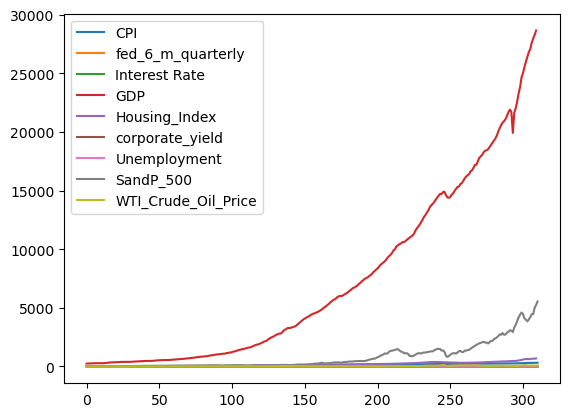

In [85]:
df.plot()

In [88]:
df.columns

Index(['Quarter', 'CPI', 'fed_6_m_quarterly', 'fed_5_y_quarterly',
       'Interest Rate', 'GDP', 'Housing_Index', 'corporate_yield',
       'Unemployment', 'SandP_500', 'WTI_Crude_Oil_Price'],
      dtype='object')

In [91]:
# copy the data 
df_max_scaled = df.copy() 
columns = ['CPI', 'fed_6_m_quarterly', 'fed_5_y_quarterly',
       'Interest Rate', 'GDP', 'Housing_Index', 'corporate_yield',
       'Unemployment', 'SandP_500', 'WTI_Crude_Oil_Price']
# apply normalization techniques 
for column in columns: 
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max() 
      
# view normalized data 
df_max_scaled 


,Quarter,CPI,fed_6_m_quarterly,fed_5_y_quarterly,Interest Rate,GDP,Housing_Index,corporate_yield,Unemployment,SandP_500,WTI_Crude_Oil_Price
0,1947Q1,0.069146,NaN,NaN,NaN,0.008487,NaN,0.170331,NaN,0.002772,0.013068
1,1947Q2,0.070134,NaN,NaN,NaN,0.008585,NaN,0.168998,NaN,0.002632,0.015085
2,1947Q3,0.071664,NaN,NaN,NaN,0.008711,NaN,0.171441,NaN,0.002784,0.015085
3,1947Q4,0.073692,NaN,NaN,NaN,0.009065,NaN,0.184988,NaN,0.002751,0.016161
4,1948Q1,0.075254,NaN,NaN,NaN,0.009275,NaN,0.189651,0.287179,0.002601,0.020732
...,...,...,...,...,...,...,...,...,...,...,...
306,2023Q3,0.975167,0.007484,-0.263182,0.295838,0.963626,0.962151,0.327337,0.284615,0.804214,0.663879
307,2023Q4,0.981746,-0.028064,-0.249706,0.299775,0.975732,0.964306,0.347102,0.287179,0.805436,0.632526
308,2024Q1,0.990957,-0.072030,-0.334331,0.299775,0.986627,0.974596,0.331113,0.292308,0.900617,0.625669
309,2024Q2,0.997874,-0.048644,-0.239592,0.299775,1.000000,1.000000,0.347768,0.307692,0.946452,0.659173


<Axes: >

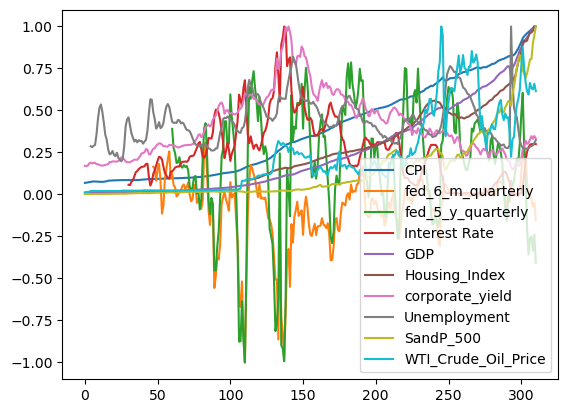

In [93]:
df_max_scaled.plot()

In [99]:
df["quarter_str"] = df["Quarter"].astype(str)
df_max_scaled["quarter_str"] = df_max_scaled["Quarter"].astype(str)

/var/folders/4s/q4zndhns13bdmf7q1_8p3crc0000gn/T/ipykernel_66344/3264351278.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


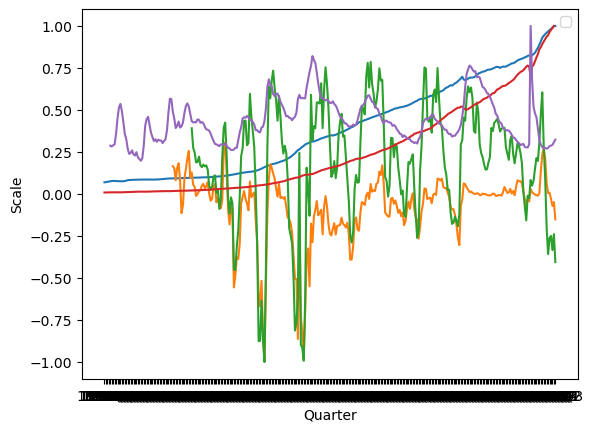

In [106]:
# plot
plt.plot(df["quarter_str"], df_max_scaled["CPI"])
plt.plot(df["quarter_str"], df_max_scaled["fed_6_m_quarterly"])
plt.plot(df["quarter_str"], df_max_scaled["fed_5_y_quarterly"])
plt.plot(df["quarter_str"], df_max_scaled["GDP"])
plt.plot(df["quarter_str"], df_max_scaled["Unemployment"])

plt.xlabel("Quarter")
plt.ylabel("Scale")

plt.legend()
plt.show()

In [112]:
corr_df = df.drop(columns=["Quarter", "quarter_str"])
corr_df

,CPI,fed_6_m_quarterly,fed_5_y_quarterly,Interest Rate,GDP,Housing_Index,corporate_yield,Unemployment,SandP_500,WTI_Crude_Oil_Price
0,21.700000,NaN,NaN,NaN,243.164,NaN,2.556667,NaN,15.368710,1.620000
1,22.010000,NaN,NaN,NaN,245.968,NaN,2.536667,NaN,14.589206,1.870000
2,22.490000,NaN,NaN,NaN,249.585,NaN,2.573333,NaN,15.434531,1.870000
3,23.126667,NaN,NaN,NaN,259.745,NaN,2.776667,NaN,15.249016,2.003333
4,23.616667,NaN,NaN,NaN,265.742,NaN,2.846667,3.733333,14.417705,2.570000
...,...,...,...,...,...,...,...,...,...,...
306,306.034333,0.026667,-0.950952,5.26,27610.128,656.36,4.913333,3.700000,4458.137460,82.296667
307,308.099000,-0.100000,-0.902258,5.33,27956.998,657.83,5.210000,3.733333,4464.907619,78.410000
308,310.989667,-0.256667,-1.208033,5.33,28269.174,664.85,4.970000,3.800000,4992.540984,77.560000
309,313.160333,-0.173333,-0.865714,5.33,28652.337,682.18,5.220000,4.000000,5246.626508,81.713333


In [113]:
corr_df.corr(method="pearson")

,CPI,fed_6_m_quarterly,fed_5_y_quarterly,Interest Rate,GDP,Housing_Index,corporate_yield,Unemployment,SandP_500,WTI_Crude_Oil_Price
CPI,1.000000,0.213875,0.119672,-0.401714,0.976747,0.961613,-0.093458,0.088778,0.871360,0.858824
fed_6_m_quarterly,0.213875,1.000000,0.755311,-0.756793,0.264039,0.422847,-0.567718,-0.042361,0.247633,0.121381
fed_5_y_quarterly,0.119672,0.755311,1.000000,-0.546386,0.076195,-0.102069,-0.100722,0.350736,-0.047170,0.055975
Interest Rate,-0.401714,-0.756793,-0.546386,1.000000,-0.469672,-0.621231,0.864641,0.066808,-0.410456,-0.335550
GDP,0.976747,0.264039,0.076195,-0.469672,1.000000,0.981100,-0.233323,-0.001815,0.945855,0.851898
Housing_Index,0.961613,0.422847,-0.102069,-0.621231,0.981100,1.000000,-0.791830,-0.440216,0.947192,0.721374
corporate_yield,-0.093458,-0.567718,-0.100722,0.864641,-0.233323,-0.791830,1.000000,0.422775,-0.310219,-0.091540
Unemployment,0.088778,-0.042361,0.350736,0.066808,-0.001815,-0.440216,0.422775,1.000000,-0.160153,0.208831
SandP_500,0.871360,0.247633,-0.047170,-0.410456,0.945855,0.947192,-0.310219,-0.160153,1.000000,0.724819
WTI_Crude_Oil_Price,0.858824,0.121381,0.055975,-0.335550,0.851898,0.721374,-0.091540,0.208831,0.724819,1.000000
